Epoch: 0 | Loss: 2.3297226428985596 | Test Loss: 4.334515571594238
OrderedDict([('weight', tensor([0.4780])), ('bias', tensor([0.1988]))])
OrderedDict([('weight', tensor([0.4819])), ('bias', tensor([0.1998]))])
OrderedDict([('weight', tensor([0.4859])), ('bias', tensor([0.2008]))])
OrderedDict([('weight', tensor([0.4898])), ('bias', tensor([0.2018]))])
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.2028]))])
OrderedDict([('weight', tensor([0.4977])), ('bias', tensor([0.2038]))])
OrderedDict([('weight', tensor([0.5017])), ('bias', tensor([0.2048]))])
OrderedDict([('weight', tensor([0.5056])), ('bias', tensor([0.2058]))])
OrderedDict([('weight', tensor([0.5096])), ('bias', tensor([0.2068]))])
OrderedDict([('weight', tensor([0.5135])), ('bias', tensor([0.2078]))])
Epoch: 10 | Loss: 2.1636974811553955 | Test Loss: 3.9709906578063965
OrderedDict([('weight', tensor([0.5175])), ('bias', tensor([0.2088]))])
OrderedDict([('weight', tensor([0.5214])), ('bias', tensor([0.2098]))])


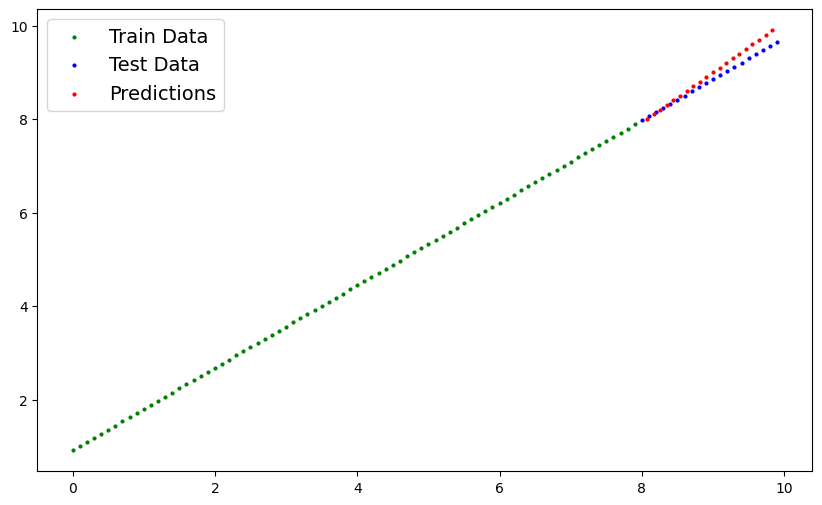

In [24]:
import torch

weight = torch.rand(1).item()
bias = torch.rand(1).item()

X = torch.arange(0, 10, 0.1).unsqueeze(dim=1)
y = weight * X + bias

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

import matplotlib.pyplot as plt
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data,train_labels,c='g',s=4,label="Train Data")
    plt.scatter(test_data,test_labels,c='b',s=4,label="Test Data")
    if predictions is not None:
        plt.scatter(predictions,test_data,c='r',s=4,label="Predictions")
    plt.legend(prop={'size':14})

import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

model_0 = LinearRegressionModel()

epochs = 1000
lr = 0.001
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
    model_0.train()
    preds = model_0(X_train)
    loss = loss_fn(preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    
    print(model_0.state_dict())

with torch.inference_mode():
    preds = model_0(X_test)
plot_predictions(predictions=preds)



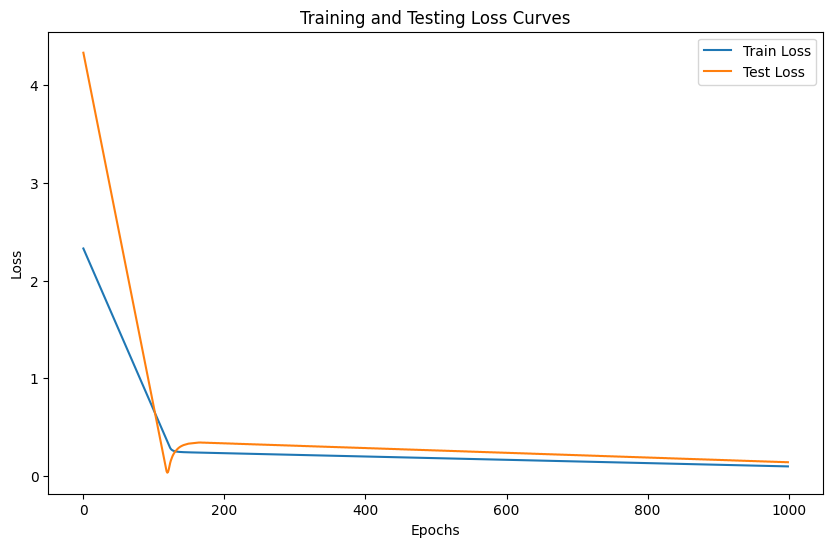

In [25]:

import numpy as np
loss_values_np = torch.tensor(loss_values).cpu().numpy()
plt.figure(figsize=(10,6))
plt.plot(epoch_count, loss_values_np, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Testing Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [26]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# !ls -1 models

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
print(f'Loaded Model Predictions: {loaded_model_0_preds}')

print(preds == loaded_model_0_preds)

Saving model to: models\01_pytorch_workflow_model_0.pth
Loaded Model Predictions: tensor([[8.0741],
        [8.1665],
        [8.2589],
        [8.3513],
        [8.4438],
        [8.5362],
        [8.6286],
        [8.7210],
        [8.8134],
        [8.9059],
        [8.9983],
        [9.0907],
        [9.1831],
        [9.2755],
        [9.3680],
        [9.4604],
        [9.5528],
        [9.6452],
        [9.7376],
        [9.8301]])
tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [27]:
model_0.parameters

<bound method Module.parameters of LinearRegressionModel()>

In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9242], requires_grad=True),
 Parameter containing:
 tensor([0.6805], requires_grad=True)]